# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [6]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [24]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ORIGEM          27028 non-null  int64   
 1   CODESTAB        26913 non-null  float64 
 2   CODMUNNASC      27028 non-null  int64   
 3   LOCNASC         27028 non-null  int64   
 4   IDADEMAE        27028 non-null  int64   
 5   ESTCIVMAE       26711 non-null  float64 
 6   ESCMAE          26716 non-null  object  
 7   CODOCUPMAE      24121 non-null  float64 
 8   QTDFILVIVO      25455 non-null  float64 
 9   QTDFILMORT      24930 non-null  float64 
 10  CODMUNRES       27028 non-null  int64   
 11  GESTACAO        25796 non-null  object  
 12  GRAVIDEZ        26949 non-null  object  
 13  PARTO           26979 non-null  object  
 14  CONSULTAS       27028 non-null  int64   
 15  DTNASC          27028 non-null  object  
 16  HORANASC        27007 non-null  float64 
 17  SEXO        

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [22]:
sinasc_raw['Faixa_Latitude'] = pd.cut(sinasc_raw['munResLat'], bins=[-float('inf'), -10.5, float('inf')], labels=['Abaixo de -10.5', 'Acima de -10.5'])

faixa = sinasc_raw.groupby('Faixa_Latitude').agg({'munResArea' : ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'], 'munResAlt' : ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
faixa

C:\Users\badmo\AppData\Local\Temp\ipykernel_7772\3708390776.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faixa = sinasc_raw.groupby('Faixa_Latitude').agg({'munResArea' : ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'], 'munResAlt' : ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})


munResArea                                               \
                          sum          mean      min        max     median   
Faixa_Latitude                                                               
Abaixo de -10.5  8.360143e+07   6434.344207  459.978  24855.724   5067.384   
Acima de -10.5   3.137711e+08  22357.926110  965.676  34096.394  34096.394   

                                             munResAlt                     \
                          std           var        sum        mean    min   
Faixa_Latitude                                                              
Abaixo de -10.5   5688.822159  3.236270e+07  3310445.0  254.786808  133.0   
Acima de -10.5   14488.909375  2.099285e+08  1530415.0  109.050520   85.0   

                                                         
                   max median         std           var  
Faixa_Latitude                                           
Abaixo de -10.5  595.0  191.0  139.771518  19536.077237  
Acima de -10.5   192.0   87.0   30.071422    904.290400

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
sinasc_raw['Area_Faixa'] = pd.cut(sinasc_raw['munResArea'], bins=[-float('inf'), 3000, float('inf')], labels=['Abaixo de 3000', 'Acima de 3000'])
variaveis_numericas_novas = ['CONSULTAS', 'APGAR5']
agrupamento_area = sinasc_raw.groupby('Area_Faixa')[variaveis_numericas_novas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
agrupamento_area


C:\Users\badmo\AppData\Local\Temp\ipykernel_8752\1994881817.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupamento_area = sinasc_raw.groupby('Area_Faixa')[variaveis_numericas_novas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


CONSULTAS                                               \
                     sum      mean min max median       std       var   
Area_Faixa                                                              
Abaixo de 3000     19520  3.740180   1   9    4.0  0.607492  0.369046   
Acima de 3000      77142  3.537326   1   9    4.0  0.820967  0.673986   

                  APGAR5                                                  
                     sum      mean  min   max median       std       var  
Area_Faixa                                                                
Abaixo de 3000   47560.0  9.130351  0.0  10.0    9.0  0.801124  0.641799  
Acima de 3000   199579.0  9.190836  0.0  10.0    9.0  0.787591  0.620299

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:
sinasc_raw['Altitude_Faixa'] = pd.cut(sinasc_raw['munResAlt'], bins=[-float('inf'), 200, 400, 600, float('inf')], labels=['Abaixo de 200', '200-400', '400-600', 'Acima de 600'])
variaveis_numericas_alt = ['PESO', 'APGAR1']
agrupamento_altitude = sinasc_raw.groupby('Altitude_Faixa')[variaveis_numericas_alt].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
agrupamento_altitude


C:\Users\badmo\AppData\Local\Temp\ipykernel_8752\3942590555.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupamento_altitude = sinasc_raw.groupby('Altitude_Faixa')[variaveis_numericas_alt].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


PESO                                                  \
                     sum         mean    min     max  median         std   
Altitude_Faixa                                                             
Abaixo de 200   67662493  3248.787295  292.0  5480.0  3275.0  546.030364   
200-400         14163525  3221.911965  285.0  5985.0  3255.0  531.160772   
400-600          5827724  3230.445676  258.0  4920.0  3275.0  561.420051   
Acima de 600           0          NaN    NaN     NaN     NaN         NaN   

                                 APGAR1                                        \
                          var       sum      mean  min   max median       std   
Altitude_Faixa                                                                  
Abaixo de 200   298149.158826  168862.0  8.140282  0.0  10.0    8.0  0.989649   
200-400         282131.765399   35490.0  8.087967  0.0  10.0    8.0  1.013252   
400-600         315192.473475   14797.0  8.225125  0.0  10.0    8.0  0.843685   
Acima de 600              NaN       0.0       NaN  NaN   NaN    NaN       NaN   

                          
                     var  
Altitude_Faixa            
Abaixo de 200   0.979404  
200-400         1.026680  
400-600         0.711804  
Acima de 600         NaN

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


Text(0.5, 0, 'Regioes de rondonia')

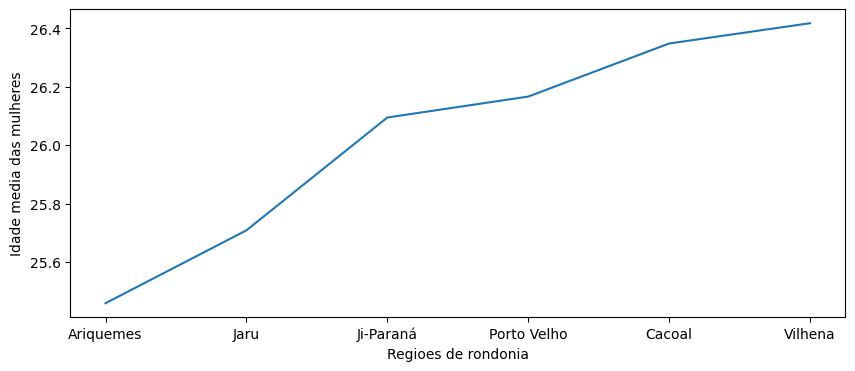

In [26]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}
sinasc_mun = sinasc_raw.set_index('munResNome')

sinasc_mun.groupby(imediatas)['IDADEMAE'].mean().sort_values().plot(figsize = [10,4])

plt.ylabel('Idade media das mulheres')
plt.xlabel('Regioes de rondonia')


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


In [29]:
df = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
df

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830
5,Buritis,Ariquemes,0.616,0.6199,726000
6,Cabixi,Vilhena,0.650,0.5887,113031
7,Cacaulândia,Ariquemes,0.646,0.5721,116635
8,Cacoal,Cacoal,0.718,0.7111,2261644
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821


In [31]:
df['idh'].min()

0.584

In [32]:
df['idh'].max()

0.736

### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [33]:
df2 = df 
bins = [0, 0.499, 0.599, 0.699, 0.799, 1.0]
labels = ['IDH muito baixo (0.000 – 0.499)',
          'IDH baixo (0.500 – 0.599)',
          'IDH médio (0.600 – 0.699)',
          'IDH alto (0.700 – 0.799)',
          'IDH muito alto (0.800 – 1.000)']

# Criando uma nova coluna 'idh_categoria' com base nos bins e labels
df2['idh_categoria'] = pd.cut(df2['idh'], bins=bins, labels=labels, include_lowest=True)

df2

,municipio,regiao,idh,ifdm,pib,idh_categoria
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,IDH médio (0.600 – 0.699)
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,IDH baixo (0.500 – 0.599)
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,IDH médio (0.600 – 0.699)
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,IDH médio (0.600 – 0.699)
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,IDH alto (0.700 – 0.799)
5,Buritis,Ariquemes,0.616,0.6199,726000,IDH médio (0.600 – 0.699)
6,Cabixi,Vilhena,0.650,0.5887,113031,IDH médio (0.600 – 0.699)
7,Cacaulândia,Ariquemes,0.646,0.5721,116635,IDH médio (0.600 – 0.699)
8,Cacoal,Cacoal,0.718,0.7111,2261644,IDH alto (0.700 – 0.799)
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,IDH baixo (0.500 – 0.599)


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [34]:
df3 = df
bins_ifdm = [0, 0.4, 0.6, 0.8, 1]
labels_ifdm = ['Desenvolvimento Baixo (0.0 – 0.4)',
               'Desenvolvimento Regular (0.4 – 0.6)',
               'Desenvolvimento Moderado (0.6 – 0.8)',
               'Desenvolvimento Alto (0.8 – 1.0)']

df3['ifdm_categoria'] = pd.cut(df3['ifdm'], bins=bins_ifdm, labels=labels_ifdm, include_lowest=True)

df3

,municipio,regiao,idh,ifdm,pib,idh_categoria,ifdm_categoria
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,IDH médio (0.600 – 0.699),Desenvolvimento Moderado (0.6 – 0.8)
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,IDH baixo (0.500 – 0.599),Desenvolvimento Regular (0.4 – 0.6)
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,IDH médio (0.600 – 0.699),Desenvolvimento Regular (0.4 – 0.6)
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,IDH médio (0.600 – 0.699),Desenvolvimento Regular (0.4 – 0.6)
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,IDH alto (0.700 – 0.799),Desenvolvimento Moderado (0.6 – 0.8)
5,Buritis,Ariquemes,0.616,0.6199,726000,IDH médio (0.600 – 0.699),Desenvolvimento Moderado (0.6 – 0.8)
6,Cabixi,Vilhena,0.650,0.5887,113031,IDH médio (0.600 – 0.699),Desenvolvimento Regular (0.4 – 0.6)
7,Cacaulândia,Ariquemes,0.646,0.5721,116635,IDH médio (0.600 – 0.699),Desenvolvimento Regular (0.4 – 0.6)
8,Cacoal,Cacoal,0.718,0.7111,2261644,IDH alto (0.700 – 0.799),Desenvolvimento Moderado (0.6 – 0.8)
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,IDH baixo (0.500 – 0.599),Desenvolvimento Regular (0.4 – 0.6)


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.